# Analisis Kolom Inflasi dan GDP perkapita

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [130]:
df = pd.read_csv('C:/Users/A r e s/Documents/SANBERCODE/Latihan/Pekan 4/datasets/Data_Negara_HELP.csv')
#df.isnull().sum()

In [131]:
group1 = df.groupby(['Negara']).sum()
drop1 = group1.drop(columns=['Ekspor', 'Impor', 'Harapan_hidup', 'Kematian_anak', 'Kesehatan', 'Pendapatan', 'Jumlah_fertiliti'])
sort1 = drop1.sort_values(by='Inflasi', ascending=False)
sort1.head(15)

,Inflasi,GDPperkapita
Negara,,
Nigeria,104.0,2330
Venezuela,45.9,13500
Mongolia,39.2,2650
Timor-Leste,26.5,3600
Equatorial Guinea,24.9,17100
Yemen,23.6,1310
Sri Lanka,22.8,2810
Angola,22.4,3530
Argentina,20.9,10300


Dari data diatas bisa dilihat hubungan kasar antara 'inflasi' dengan 'GDPperkapita', rata-rata negara yang mengalami inflasi tinggi memiliki GDPperkapita yang rendah, hal ini berarti inflasi sangat mempengaruhi kehidupan masyarakat di negara itu.

Hubungan sederhana dari kedua variabel bisa dilihat dari scatterplot dibawah 

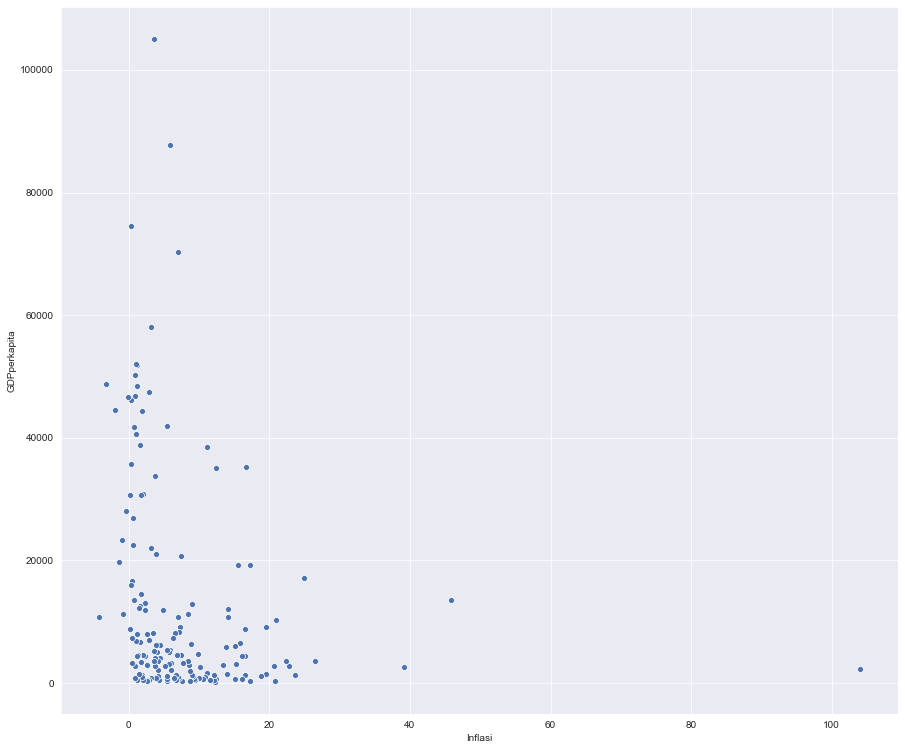

In [132]:
sns.set({'figure.figsize':(15,13)})
sns.scatterplot(x=sort1['Inflasi'] , y=sort1['GDPperkapita'])

In [133]:
pertimbangan1 = sort1[(sort1['Inflasi'] > 25) & (sort1['Inflasi'] < 120) & (sort1['GDPperkapita'] < 10000)]
pertimbangan1

,Inflasi,GDPperkapita
Negara,,
Nigeria,104.0,2330
Mongolia,39.2,2650
Timor-Leste,26.5,3600


Berdasarkan Scatterplot diatas, terdapat 3 negara yang memiliki nilai inflasi tinggi dengan GDPperkapita rendah :

- Nigeria
- Mongolia
- Timor-Leste

3 negara tersebut akan dipertimbangkan untuk masuk kedalam 10 negera penerima bantuan Kemanusiaan dari HELP Internasional berdasarkan dampak nilai inflasi terhadap kemiskinan

-- Venezuela tidak dimasukkan karena GDPperkapita negara tersebut cukup untuk menahan angka inflasinya

## Analisis lebih lanjut tentang dampak Inflasi terhadap GDPperkapita

Untuk menganalisis lebih lanjut topik ini, maka data pada kolom inflasi dan GDPperkapita harus dibersihkan terlebih dahulu

### Missing Value

In [134]:
#Check missing value
sort1.isnull().sum()

Inflasi         0
GDPperkapita    0
dtype: int64

Karena tidak ada missing value (data NaN) pada dataframe, jadi perlu dilakukan handling missing value

### Outliers dan Clustering

Mendeteksi outlier di kedua kolom menggunakan boxplot

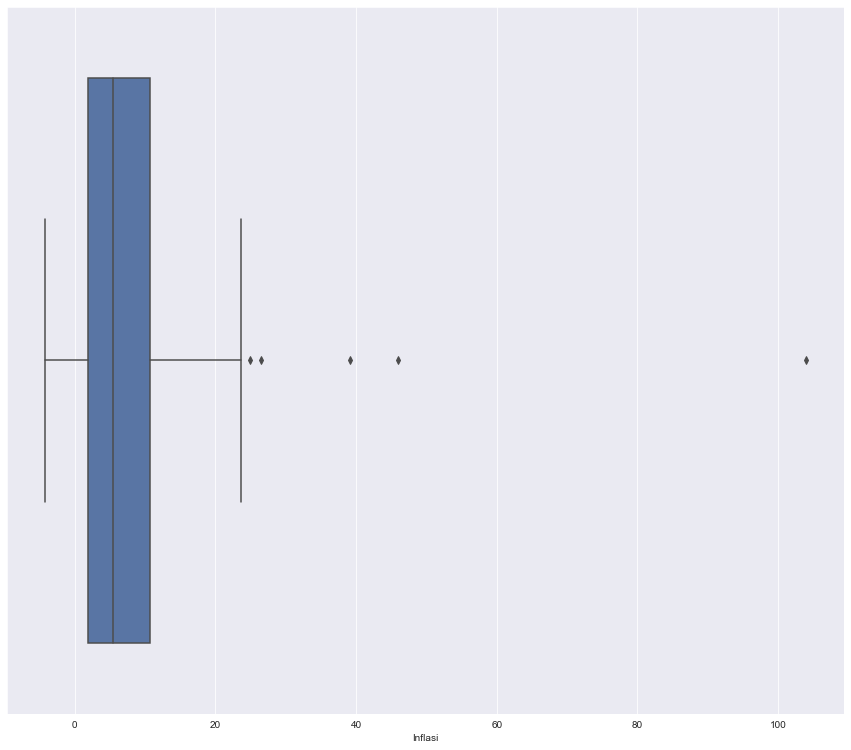

In [135]:
sns.boxplot(sort1['Inflasi'])

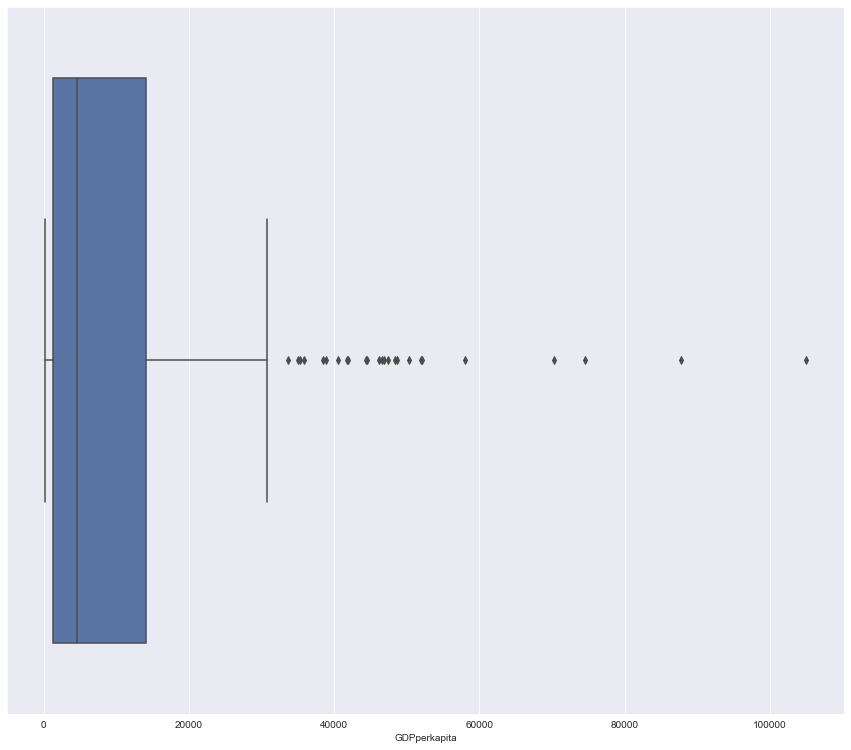

In [136]:
sns.boxplot(sort1['GDPperkapita'])

In [137]:
def batas(x) : 
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    df_final=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return df_final

data = batas(sort1[['Inflasi', 'GDPperkapita']])
data.dropna(axis=0, inplace=True)
data2 = pd.DataFrame(data=data, columns = ['Inflasi', 'GDPperkapita'])

sc = StandardScaler()
data_std = sc.fit_transform(data2.astype(float))

data3 = pd.DataFrame(data=data_std, columns = ['Inflasi', 'GDPperkapita'])

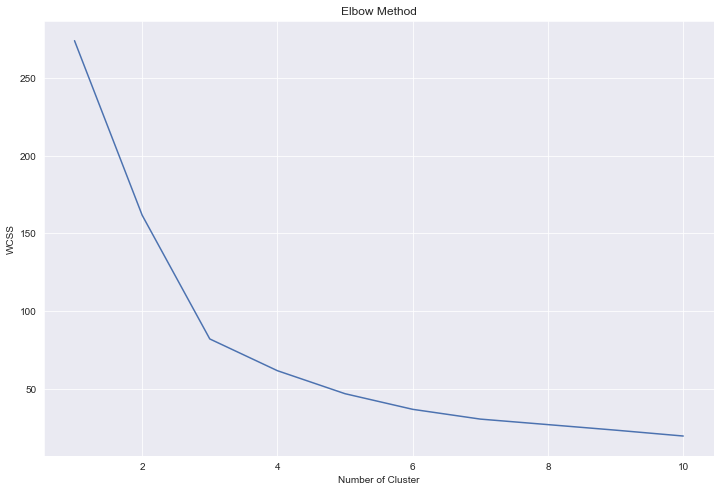

In [138]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data3)
  wcss.append(kmeans.inertia_)

plt.subplots(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

plt.show()

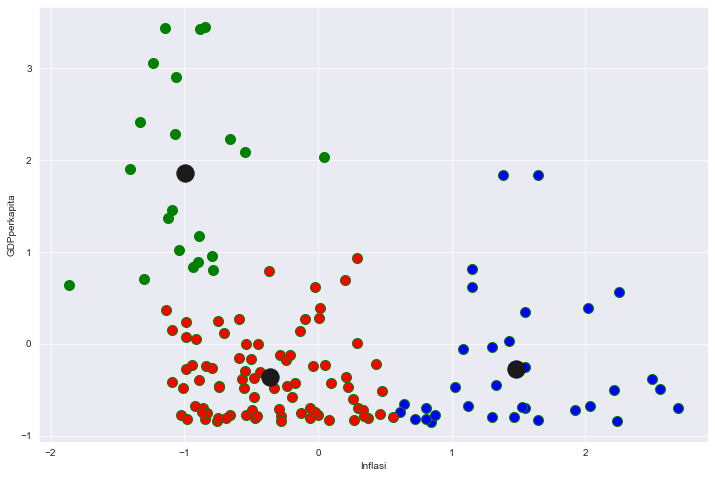

In [139]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data_std)
labels1 = kmeans.labels_


data3['label_kmeans1'] = labels1

plt.subplots(figsize=(12,8))
plt.scatter(data3['Inflasi'][data3.label_kmeans1 == 0], data3['GDPperkapita'][data3.label_kmeans1 == 0], color='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(data3['Inflasi'][data3.label_kmeans1 == 1], data3['GDPperkapita'][data3.label_kmeans1 == 1], color='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(data3['Inflasi'][data3.label_kmeans1 == 2], data3['GDPperkapita'][data3.label_kmeans1 == 2], color='green', s=100, edgecolor='green', linestyle='-')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Inflasi')
plt.ylabel('GDPperkapita')
plt.show()

Bisa dilihat dari hasil klaster diatas, klaster merah dan biru memiliki lebih banyak anggota daripada klaster hijau, ini artinya
sebagian besar negara merasakan dampak tingginya inflasi terhadap Nilai GDPperkapita negara mereka.

## Kesimpulan

Negara yang dipertimbangkan untuk dimasukkan sebagai penerima bantuan dari HELP Internasional :

- Nigeria
- Mongolia
- Timor-leste